<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.423130,45.826171,-0.000291,147.249010,147.249684,-0.000674
1,0.0,1.0,99.226669,88.627547,-0.000023,197.854193,197.854451,-0.000259
2,0.0,2.0,92.518963,72.343184,-0.000041,174.862106,174.862404,-0.000298
3,0.0,3.0,85.251467,94.057231,0.000248,189.308946,189.308775,0.000171
4,0.0,4.0,67.327355,68.365215,-0.000468,145.692102,145.692612,-0.000510
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,36.489901,33.150816,0.000972,79.641689,79.640869,0.000820
19996,999.0,16.0,22.687479,69.496522,-0.000524,102.183476,102.183522,-0.000045
19997,999.0,17.0,50.844948,74.651562,-0.000526,135.495984,135.495995,-0.000010
19998,999.0,18.0,89.940929,79.947827,-0.000601,179.888154,179.888220,-0.000066


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.423130,45.826171,-0.000291,147.249010,147.249684,-0.000674
1,0.0,1.0,99.226669,88.627547,-0.000023,197.854193,197.854451,-0.000259
2,0.0,2.0,92.518963,72.343184,-0.000041,174.862106,174.862404,-0.000298
3,0.0,3.0,85.251467,94.057231,0.000248,189.308946,189.308775,0.000171
4,0.0,4.0,67.327355,68.365215,-0.000468,145.692102,145.692612,-0.000510
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,36.489901,33.150816,0.000972,79.641689,79.640869,0.000820
19996,999.0,16.0,22.687479,69.496522,-0.000524,102.183476,102.183522,-0.000045
19997,999.0,17.0,50.844948,74.651562,-0.000526,135.495984,135.495995,-0.000010
19998,999.0,18.0,89.940929,79.947827,-0.000601,179.888154,179.888220,-0.000066


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.423130  45.826171 -0.000291  147.249010  147.249684 -0.000674
      1.0    99.226669  88.627547 -0.000023  197.854193  197.854451 -0.000259
      2.0    92.518963  72.343184 -0.000041  174.862106  174.862404 -0.000298
      3.0    85.251467  94.057231  0.000248  189.308946  189.308775  0.000171
      4.0    67.327355  68.365215 -0.000468  145.692102  145.692612 -0.000510
...                ...        ...       ...         ...         ...       ...
999.0 15.0   36.489901  33.150816  0.000972   79.641689   79.640869  0.000820
      16.0   22.687479  69.496522 -0.000524  102.183476  102.183522 -0.000045
      17.0   50.844948  74.651562 -0.000526  135.495984  135.495995 -0.000010
      18.0   89.940929  79.947827 -0.000601  179.888154  179.888220 -0.000066
      19.0   41.799406  91.555870 -0.000703  143.354573  143.354463  0.000110

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.423130  45.826171 -0.000291  147.249010  147.249684 -0.000674
      1.0    99.226669  88.627547 -0.000023  197.854193  197.854451 -0.000259
      2.0    92.518963  72.343184 -0.000041  174.862106  174.862404 -0.000298
      3.0    85.251467  94.057231  0.000248  189.308946  189.308775  0.000171
      4.0    67.327355  68.365215 -0.000468  145.692102  145.692612 -0.000510
...                ...        ...       ...         ...         ...       ...
999.0 15.0   36.489901  33.150816  0.000972   79.641689   79.640869  0.000820
      16.0   22.687479  69.496522 -0.000524  102.183476  102.183522 -0.000045
      17.0   50.844948  74.651562 -0.000526  135.495984  135.495995 -0.000010
      18.0   89.940929  79.947827 -0.000601  179.888154  179.888220 -0.000066
      19.0   41.799406  91.555870 -0.000703  143.354573  143.354463  0.000110

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.423130,45.826171,-0.000291,147.249010,147.249684,-0.000674
1,0.0,1.0,99.226669,88.627547,-0.000023,197.854193,197.854451,-0.000259
2,0.0,2.0,92.518963,72.343184,-0.000041,174.862106,174.862404,-0.000298
3,0.0,3.0,85.251467,94.057231,0.000248,189.308946,189.308775,0.000171
4,0.0,4.0,67.327355,68.365215,-0.000468,145.692102,145.692612,-0.000510
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,36.489901,33.150816,0.000972,79.641689,79.640869,0.000820
19996,999.0,16.0,22.687479,69.496522,-0.000524,102.183476,102.183522,-0.000045
19997,999.0,17.0,50.844948,74.651562,-0.000526,135.495984,135.495995,-0.000010
19998,999.0,18.0,89.940929,79.947827,-0.000601,179.888154,179.888220,-0.000066


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.423130  45.826171 -0.000291  147.249010  147.249684 -0.000674
      1.0    99.226669  88.627547 -0.000023  197.854193  197.854451 -0.000259
      2.0    92.518963  72.343184 -0.000041  174.862106  174.862404 -0.000298
      3.0    85.251467  94.057231  0.000248  189.308946  189.308775  0.000171
      4.0    67.327355  68.365215 -0.000468  145.692102  145.692612 -0.000510
...                ...        ...       ...         ...         ...       ...
999.0 15.0   36.489901  33.150816  0.000972   79.641689   79.640869  0.000820
      16.0   22.687479  69.496522 -0.000524  102.183476  102.183522 -0.000045
      17.0   50.844948  74.651562 -0.000526  135.495984  135.495995 -0.000010
      18.0   89.940929  79.947827 -0.000601  179.888154  179.888220 -0.000066
      19.0   41.799406  91.555870 -0.000703  143.354573  143.354463  0.000110

[20000 rows x 6 columns]

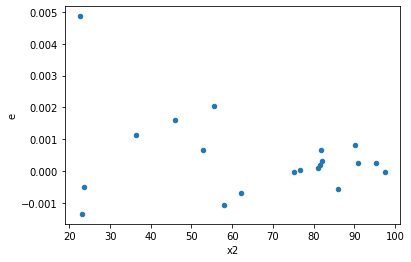

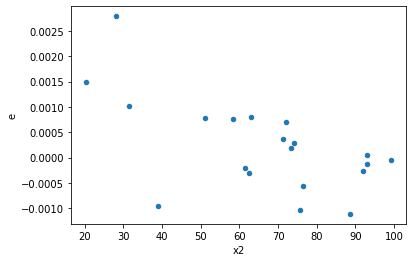

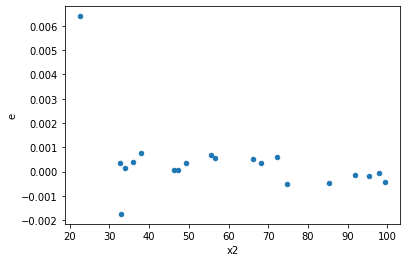

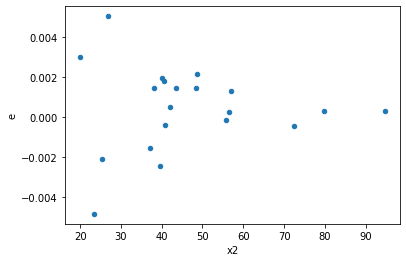

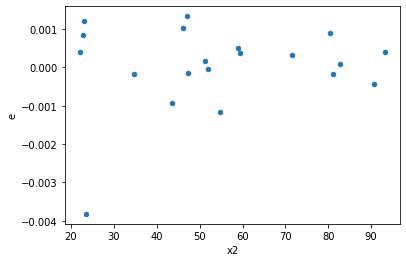

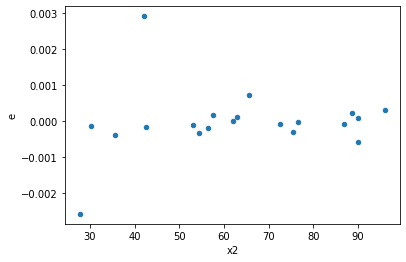

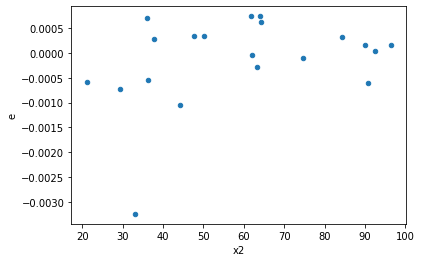

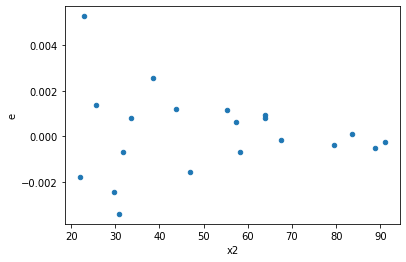

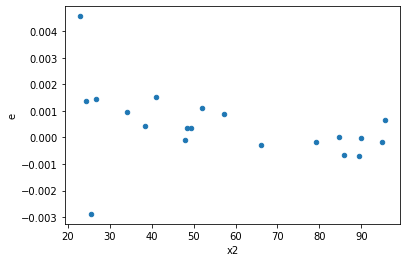

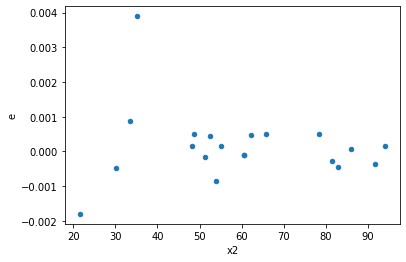

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
46.0,6.0,6.0,2.1212593660850062e-06,8.543548093540827e-06,3.5354322768083437e-07,1.4239246822568045e-06,4.027582967993579,0.11416153402185225,0.9429192329890739,0.057080767010926126,Reject005=1 : Homoscedasticity
56.0,6.0,6.0,3.2360306220313656e-06,7.87014697827999e-06,5.393384370052276e-07,1.3116911630466648e-06,2.432037238677189,0.30370910661854,0.84814544669073,0.15185455330927,Reject005=1 : Homoscedasticity
63.0,6.0,6.0,1.096283814328931e-05,3.238686124788017e-05,1.8271396905482182e-06,5.397810207980028e-06,2.954240573888721,0.21318081765717922,0.8934095911714104,0.10659040882858961,Reject005=1 : Homoscedasticity
137.0,6.0,6.0,1.910505328405731e-06,3.1587548648813927e-06,3.184175547342885e-07,5.264591441468988e-07,1.6533609291303546,0.5566253621026824,0.7216873189486588,0.2783126810513412,Reject005=1 : Homoscedasticity
158.0,6.0,6.0,9.879628987087288e-06,1.1429427774226339e-05,1.6466048311812147e-06,1.9049046290377232e-06,1.156868116116976,0.8641121582602931,0.5679439208698535,0.43205607913014654,Reject005=1 : Homoscedasticity
212.0,6.0,6.0,9.451002521873792e-07,9.583198382395913e-07,1.5751670869789654e-07,1.5971997303993187e-07,1.0139874960583453,0.9869782152042572,0.5065108923978714,0.4934891076021286,Reject005=1 : Homoscedasticity
230.0,6.0,6.0,2.8657603968975153e-06,4.208790916825413e-06,4.776267328162526e-07,7.014651528042355e-07,1.4686471769872556,0.6525102116228867,0.6737448941885567,0.32625510581144335,Reject005=1 : Homoscedasticity
237.0,6.0,6.0,2.1103162683082536e-06,2.714754822459278e-06,3.517193780513756e-07,4.524591370765463e-07,1.2864208380649862,0.7675637277188023,0.6162181361405988,0.38378186385940116,Reject005=1 : Homoscedasticity
253.0,6.0,6.0,2.140906376473368e-06,2.4036481706103514e-06,3.56817729412228e-07,4.0060802843505855e-07,1.1227245605059049,0.8918388632191707,0.5540805683904146,0.44591943160958536,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,3.7771311659707867e-06,7.524359069046258e-07,6.295218609951311e-07,1.254059844841043e-07,0.1992083075333808,0.07035258825039334,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,5.865038692512025e-05,6.019658451745283e-07,9.775064487520042e-06,1.0032764086242138e-07,0.010263629563826515,2.0653177745504073e-05,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,4.332467475785572e-05,1.2519266208085658e-06,7.220779126309286e-06,2.0865443680142764e-07,0.02889638820846691,0.0004245883667749325,Reject005=0 : Heteroscedasticity
3.0,6.0,6.0,1.704407908212614e-06,1.6260480367815829e-06,2.8406798470210235e-07,2.7100800613026383e-07,0.9540251655407972,0.9559007693434853,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,3.133076136452629e-05,1.023895895004034e-06,5.221793560754381e-06,1.7064931583400567e-07,0.03268021109002868,0.0006041433209214545,Reject005=0 : Heteroscedasticity
5.0,6.0,6.0,2.4940171653567613e-05,9.100440580404935e-07,4.156695275594602e-06,1.516740096734156e-07,0.036489085587761566,0.0008271878475778878,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,9.710693957454803e-06,1.3445740425550448e-07,1.6184489929091337e-06,2.2409567375917412e-08,0.013846322914160308,4.990882099867023e-05,Reject005=0 : Heteroscedasticity
7.0,6.0,6.0,6.733529108064454e-06,7.824229548850941e-07,1.1222548513440756e-06,1.3040382581418234e-07,0.11619805043213079,0.01918670371991106,Reject005=0 : Heteroscedasticity
8.0,6.0,6.0,1.551516136195047e-05,1.2484904138899886e-06,2.585860226991745e-06,2.0808173564833142e-07,0.08046905763750535,0.0073664219695190195,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    655
Reject005=1 : Homoscedasticity      345
Name: Result_test, dtype: int64